<a href="https://colab.research.google.com/github/slnntk/1.6-An-lise-de-Dados-Olist-v1/blob/main/Analise_Dados1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import kagglehub

path = kagglehub.dataset_download('olistbr/brazilian-ecommerce')

print('Caminho do arquivo:', path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Caminho do arquivo: /kaggle/input/brazilian-ecommerce


In [61]:
!ls {path}

olist_customers_dataset.csv	  olist_orders_dataset.csv
olist_geolocation_dataset.csv	  olist_products_dataset.csv
olist_order_items_dataset.csv	  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv


# ANÁLISE DE DADOS

In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Qual o percentual de pedidos entregues após a data estimada pela olist?**

In [63]:
#Carregando dados:


orders_path = os.path.join(path, 'olist_orders_dataset.csv')
order_items_path = os.path.join(path, 'olist_order_items_dataset.csv')
customers_path = os.path.join(path, 'olist_customers_dataset.csv')

In [64]:
#Carregar dataframe:

orders_df = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
print("Primeiras linhas do dataset:")
print(orders_df.head())

Primeiras linhas do dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-

Primeiro nós carregamos o dataset, e convertemos ele para datetime.
Filtramos apenas os pedidos que já foram entregues, e comparamos a data de entrega com a estimada, depois calculamos o percentual apenas dos pedidos que passaram da data estimada.

In [65]:
# Carregar o dataset de pedidos
orders_df = pd.read_csv(orders_path)

# Converter colunas de data
date_cols = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

# Filtrar apenas pedidos entregues
delivered_df = orders_df[orders_df['order_status'] == 'delivered']

# Contar atrasados (entregue depois da estimada)
atrasados = (delivered_df['order_delivered_customer_date'] > delivered_df['order_estimated_delivery_date']).sum()

# Total de entregues
total_entregues = len(delivered_df)

# Percentual
percentual_atraso = (atrasados / total_entregues) * 100

print(f"Percentual de pedidos entregues após a data estimada: {percentual_atraso:.2f}%")

Percentual de pedidos entregues após a data estimada: 8.11%


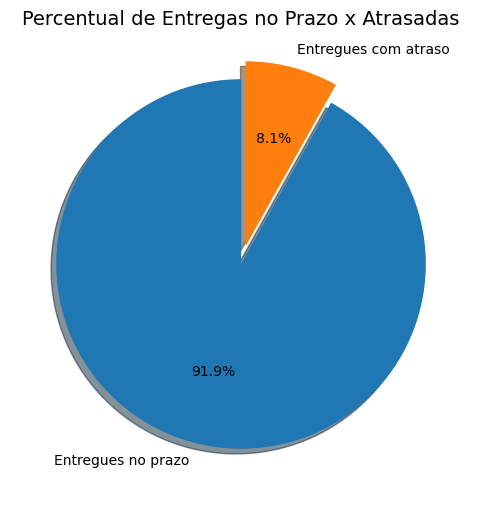

In [66]:
no_prazo = total_entregues - atrasados
valores = [no_prazo, atrasados]
labels = ['Entregues no prazo', 'Entregues com atraso']

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0,0.1), shadow=True)
plt.title("Percentual de Entregas no Prazo x Atrasadas", fontsize=14)
plt.show()

# # Gráfico de barras
# plt.figure(figsize=(6,4))
# plt.bar(labels, valores, color=['green','red'])
# plt.title("Quantidade de Entregas no Prazo x Atrasadas", fontsize=14)
# plt.ylabel("Quantidade de Pedidos")
# plt.show()

Breve análise do gráfico acima: 91,9% dos pedidos foram entregues dentro do prazo estimado.

Apenas 8,1% foram entregues com atraso.

Isso indica que a logistica da olist é bastante eficiente, significando que a cada 10 pedidos, 9 são entregues.

No entanto 8% ainda é uma taxa relevante considerando o número de pedidos.

**Qual o método de pagamento mais utilizado em pedidos acima de R$
150,00?**

O método de pagamento mais utilizado em pedidos acima de R$150,00 foi: credit_card (25738 vezes)


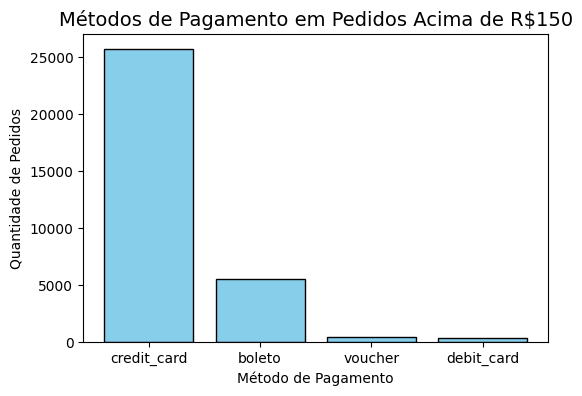

In [67]:
# Carregar dataset de pagamentos
payments_path = os.path.join(path, 'olist_order_payments_dataset.csv')
payments_df = pd.read_csv(payments_path)

# Filtrar pagamentos acima de R$150
pagamentos_acima_150 = payments_df[payments_df['payment_value'] > 150]

# Contar métodos de pagamento
metodo_mais_usado = pagamentos_acima_150['payment_type'].value_counts().idxmax()
qtd = pagamentos_acima_150['payment_type'].value_counts().max()

print(f"O método de pagamento mais utilizado em pedidos acima de R$150,00 foi: {metodo_mais_usado} ({qtd} vezes)")

pagamentos_counts = pagamentos_acima_150['payment_type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(pagamentos_counts.index, pagamentos_counts.values, color='skyblue', edgecolor='black')
plt.title("Métodos de Pagamento em Pedidos Acima de R$150", fontsize=14)
plt.xlabel("Método de Pagamento")
plt.ylabel("Quantidade de Pedidos")
plt.show()

Breve análise do gráfico acima:
O método de pagamento mais utilizado em pedidos acima de R$150,00 é o cartão de crédito, com larga vantagem: 25.738 pedidos.

Em segundo lugar aparece o boleto, mas com uma diferença significativa (pouco mais de 5.000 pedidos).

Voucher e cartão de débito praticamente não são relevantes nesse contexto, aparecendo em quantidades muito pequenas.



**Qual é a relação entre o tempo de entrega e a nota de avaliação do cliente?**

In [68]:
# Análise da relação entre tempo de entrega e avaliação do cliente
print("\n" + "="*70)
print("PERGUNTA 4: Relação entre tempo de entrega e avaliação do cliente")
print("="*70)

# Carregar datasets necessários
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))

# Converter datas
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Merge entre pedidos e avaliações
orders_reviews = orders.merge(reviews, on='order_id', how='inner')

# Filtrar apenas pedidos entregues com datas válidas
delivered_reviews = orders_reviews[
    (orders_reviews['order_status'] == 'delivered') &
    (orders_reviews['order_delivered_customer_date'].notna()) &
    (orders_reviews['order_purchase_timestamp'].notna()) &
    (orders_reviews['review_score'].notna())
].copy()

# Calcular tempo de entrega em dias
delivered_reviews['tempo_entrega_dias'] = (
    delivered_reviews['order_delivered_customer_date'] -
    delivered_reviews['order_purchase_timestamp']
).dt.days

# Remover outliers extremos (tempo de entrega negativo ou muito alto)
delivered_reviews = delivered_reviews[
    (delivered_reviews['tempo_entrega_dias'] >= 0) &
    (delivered_reviews['tempo_entrega_dias'] <= 100)
]

# Calcular estatísticas por nota de avaliação
stats_by_score = delivered_reviews.groupby('review_score')['tempo_entrega_dias'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)

# Calcular correlação
correlation = delivered_reviews['tempo_entrega_dias'].corr(delivered_reviews['review_score'])

print(f"Total de avaliações analisadas: {len(delivered_reviews):,}")
print(f"Correlação entre tempo de entrega e nota: {correlation:.3f}")
print(f"Tempo médio de entrega: {delivered_reviews['tempo_entrega_dias'].mean():.1f} dias")
print(f"\nEstatísticas por nota de avaliação:")
print(stats_by_score)


PERGUNTA 4: Relação entre tempo de entrega e avaliação do cliente
Total de avaliações analisadas: 96,293
Correlação entre tempo de entrega e nota: -0.349
Tempo médio de entrega: 12.0 dias

Estatísticas por nota de avaliação:
              count   mean  median    std
review_score                             
1              9381  20.55    16.0  14.85
2              2938  16.05    13.0  11.55
3              7957  13.72    12.0   9.33
4             18973  11.74    10.0   7.31
5             57044  10.19     9.0   6.49


/tmp/ipython-input-1987760368.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=sorted(delivered_reviews['review_score'].unique()))


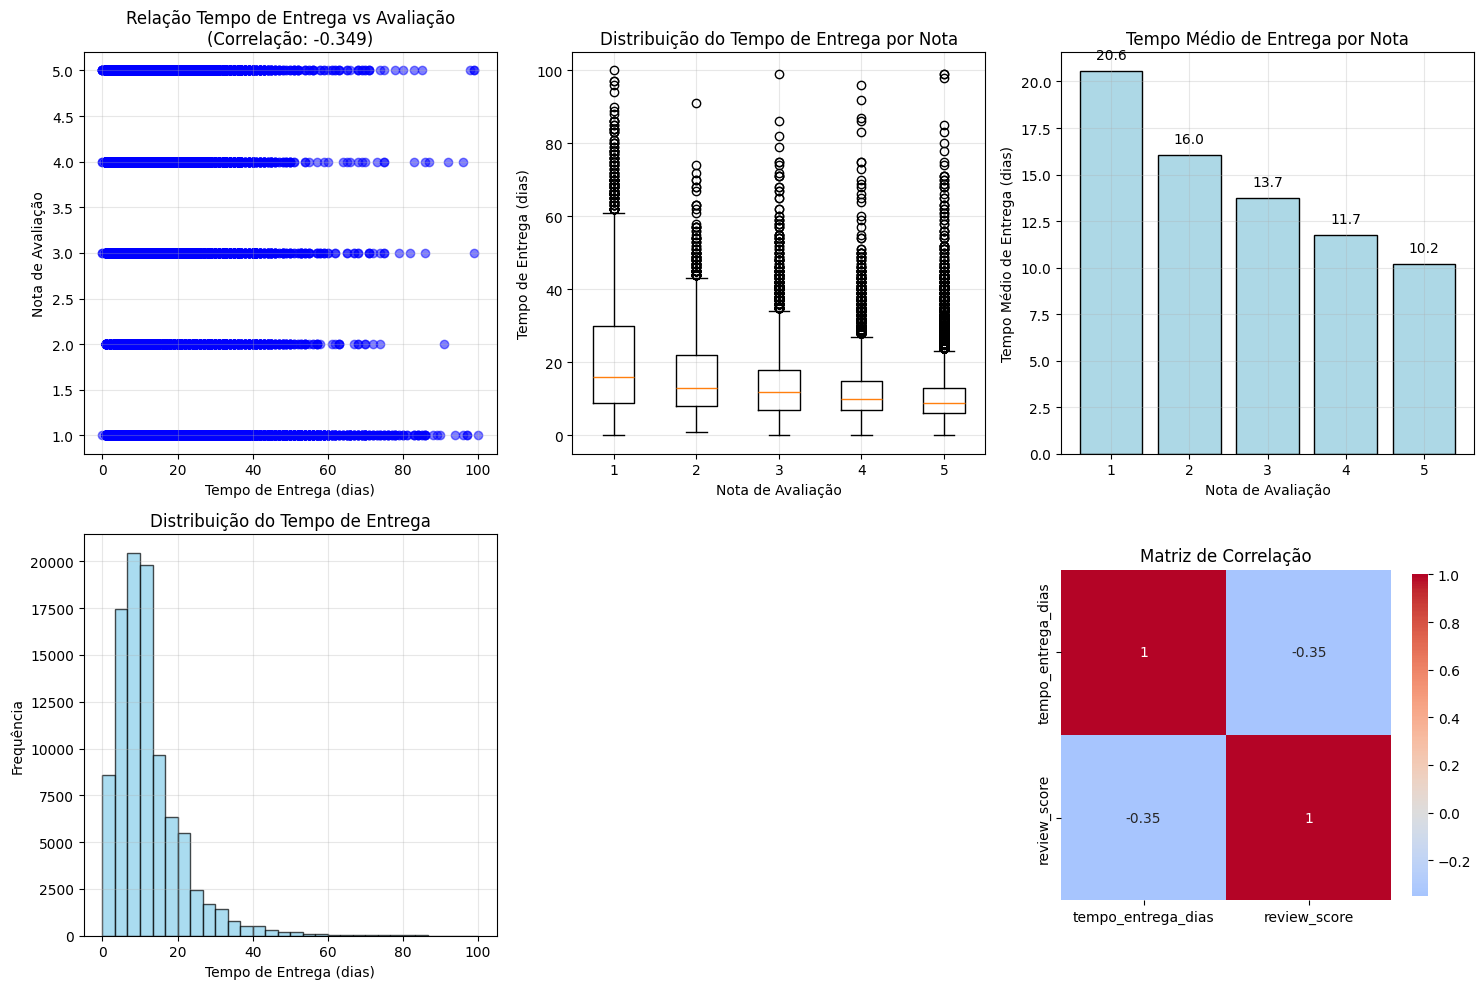

In [69]:
# Criar visualização para análise tempo de entrega vs avaliação
import seaborn as sns # Import seaborn
plt.figure(figsize=(15, 10))

# Scatter plot
plt.subplot(2, 3, 1)
plt.scatter(delivered_reviews['tempo_entrega_dias'], delivered_reviews['review_score'],
           alpha=0.5, color='blue')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação')
plt.title(f'Relação Tempo de Entrega vs Avaliação\n(Correlação: {correlation:.3f})')
plt.grid(True, alpha=0.3)

# Boxplot por nota
plt.subplot(2, 3, 2)
box_data = [delivered_reviews[delivered_reviews['review_score'] == score]['tempo_entrega_dias']
           for score in sorted(delivered_reviews['review_score'].unique())]
plt.boxplot(box_data, labels=sorted(delivered_reviews['review_score'].unique()))
plt.xlabel('Nota de Avaliação')
plt.ylabel('Tempo de Entrega (dias)')
plt.title('Distribuição do Tempo de Entrega por Nota')
plt.grid(True, alpha=0.3)

# Tempo médio por nota
plt.subplot(2, 3, 3)
avg_time_by_score = delivered_reviews.groupby('review_score')['tempo_entrega_dias'].mean()
bars = plt.bar(avg_time_by_score.index, avg_time_by_score.values,
              color='lightblue', edgecolor='black')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.title('Tempo Médio de Entrega por Nota')
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, avg_time_by_score.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
            f'{value:.1f}', ha='center', va='bottom')

# Histograma de tempo de entrega
plt.subplot(2, 3, 4)
plt.hist(delivered_reviews['tempo_entrega_dias'], bins=30,
        color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.title('Distribuição do Tempo de Entrega')
plt.grid(True, alpha=0.3)

# Heatmap de correlação
plt.subplot(2, 3, 6)
corr_data = delivered_reviews[['tempo_entrega_dias', 'review_score']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0,
           square=True, cbar_kws={'shrink': .8})
plt.title('Matriz de Correlação')

plt.tight_layout()
plt.show()

**Quais são as 5 categorias de produtos mais vendidas e qual a receita total
gerada por cada uma?**

In [70]:
# Análise das 5 categorias de produtos mais vendidas
print("\n" + "="*70)
print("PERGUNTA 3: Top 5 categorias de produtos mais vendidas e receita")
print("="*70)

# Carregar datasets necessários
order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))
products = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'))

# Merge dos dados
items_products = order_items.merge(products, on='product_id', how='left')

# Remover linhas onde category é nulo
items_products = items_products.dropna(subset=['product_category_name'])

# Agrupar por categoria
category_stats = items_products.groupby('product_category_name').agg({
    'order_id': 'count',  # Quantidade vendida
    'price': 'sum'        # Receita total
}).round(2)

category_stats.columns = ['quantidade_vendida', 'receita_total']
category_stats = category_stats.sort_values('quantidade_vendida', ascending=False)

# Top 5 categorias
top_5_categories = category_stats.head(5)

# Tentar traduzir nomes se disponível
try:
    category_translation = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))
    translation_dict = dict(zip(category_translation['product_category_name'],
                               category_translation['product_category_name_english']))
    top_5_categories_translated = top_5_categories.rename(index=translation_dict)
    print("Tradução das categorias carregada com sucesso!")
except:
    translation_dict = {}
    top_5_categories_translated = top_5_categories
    print("Arquivo de tradução não encontrado, usando nomes originais.")

# Apresentar resultados
print("Top 5 categorias de produtos mais vendidas:")
print("-" * 50)
for i, (categoria, dados) in enumerate(top_5_categories.iterrows(), 1):
    # Tentar mostrar tradução se disponível
    categoria_traduzida = translation_dict.get(categoria, categoria)
    if categoria_traduzida != categoria:
        print(f"{i}. {categoria_traduzida} ({categoria})")
    else:
        print(f"{i}. {categoria}")
    print(f"   Quantidade vendida: {dados['quantidade_vendida']:,}")
    print(f"   Receita total: R$ {dados['receita_total']:,.2f}")
    print()

print(f"Receita total das top 5: R$ {top_5_categories['receita_total'].sum():,.2f}")
print(f"Quantidade total vendida das top 5: {top_5_categories['quantidade_vendida'].sum():,}")


PERGUNTA 3: Top 5 categorias de produtos mais vendidas e receita
Tradução das categorias carregada com sucesso!
Top 5 categorias de produtos mais vendidas:
--------------------------------------------------
1. bed_bath_table (cama_mesa_banho)
   Quantidade vendida: 11,115.0
   Receita total: R$ 1,036,988.68

2. health_beauty (beleza_saude)
   Quantidade vendida: 9,670.0
   Receita total: R$ 1,258,681.34

3. sports_leisure (esporte_lazer)
   Quantidade vendida: 8,641.0
   Receita total: R$ 988,048.97

4. furniture_decor (moveis_decoracao)
   Quantidade vendida: 8,334.0
   Receita total: R$ 729,762.49

5. computers_accessories (informatica_acessorios)
   Quantidade vendida: 7,827.0
   Receita total: R$ 911,954.32

Receita total das top 5: R$ 4,925,435.80
Quantidade total vendida das top 5: 45,587


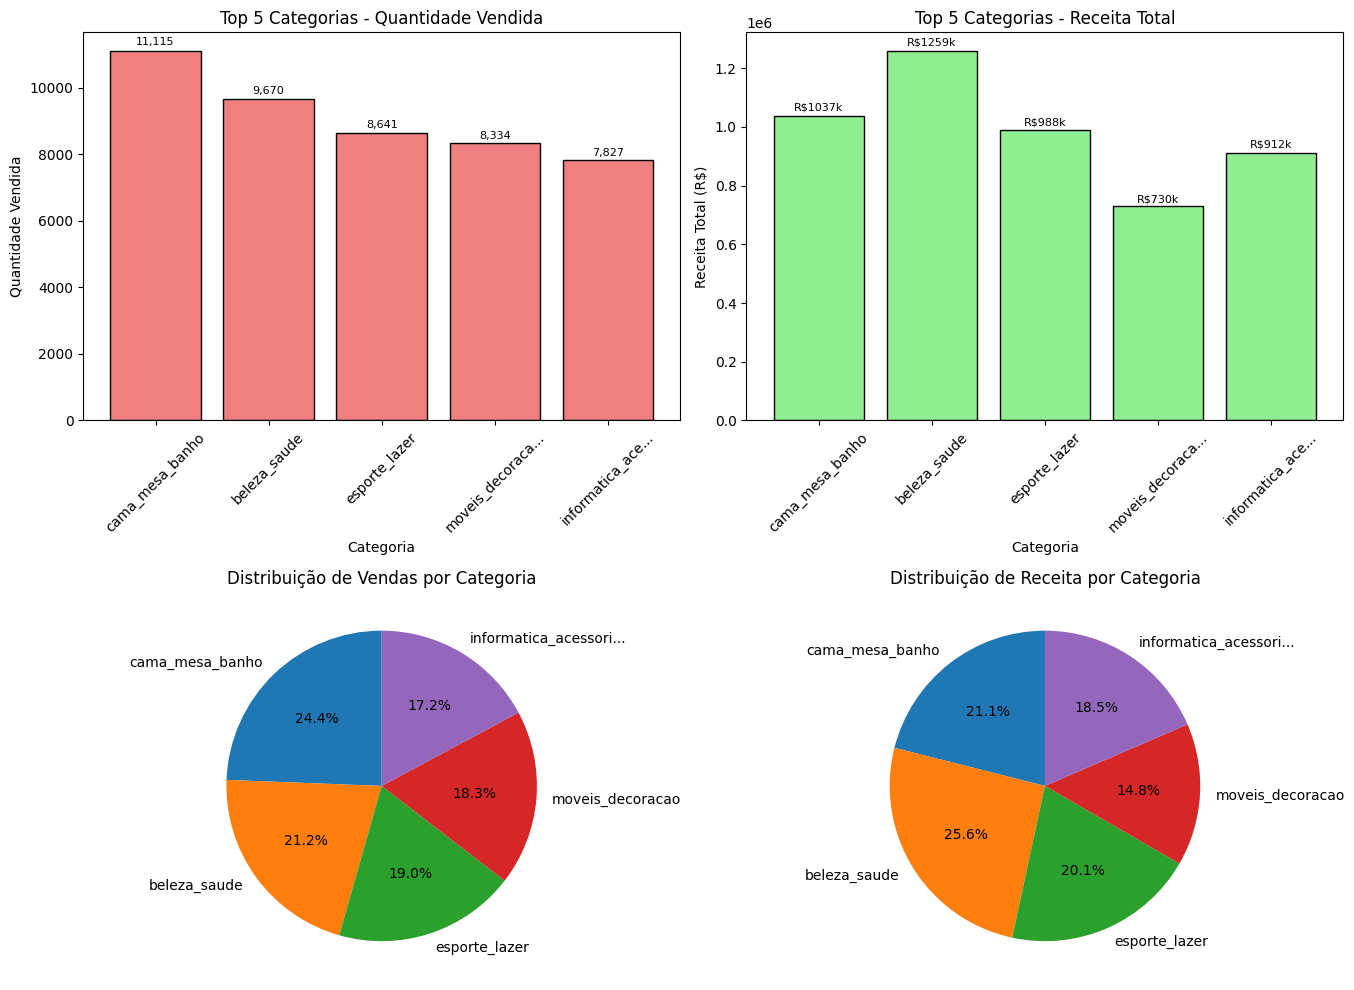

In [71]:
# Criar visualização para análise de categorias
plt.figure(figsize=(14, 10))

# Gráfico de barras - Quantidade vendida
plt.subplot(2, 2, 1)
bars1 = plt.bar(range(5), top_5_categories['quantidade_vendida'],
               color='lightcoral', edgecolor='black')
plt.title('Top 5 Categorias - Quantidade Vendida')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(range(5), [cat[:15] + '...' if len(cat) > 15 else cat
                     for cat in top_5_categories.index], rotation=45)

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Gráfico de barras - Receita total
plt.subplot(2, 2, 2)
bars2 = plt.bar(range(5), top_5_categories['receita_total'],
               color='lightgreen', edgecolor='black')
plt.title('Top 5 Categorias - Receita Total')
plt.xlabel('Categoria')
plt.ylabel('Receita Total (R$)')
plt.xticks(range(5), [cat[:15] + '...' if len(cat) > 15 else cat
                     for cat in top_5_categories.index], rotation=45)

# Adicionar valores nas barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
            f'R${height/1000:.0f}k', ha='center', va='bottom', fontsize=8)

# Gráfico de pizza - Quantidade
plt.subplot(2, 2, 3)
plt.pie(top_5_categories['quantidade_vendida'],
        labels=[cat[:20] + '...' if len(cat) > 20 else cat
               for cat in top_5_categories.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Vendas por Categoria')

# Gráfico de pizza - Receita
plt.subplot(2, 2, 4)
plt.pie(top_5_categories['receita_total'],
        labels=[cat[:20] + '...' if len(cat) > 20 else cat
               for cat in top_5_categories.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Receita por Categoria')

plt.tight_layout()
plt.show()